# 1. Importação

In [5]:
import pandas as pd
import os

In [6]:
diretorio: str = r'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML'
diretorio_df: str = fr'{diretorio}\\DATAFRAMES'
arquivo: str = 'DF_CAU_02.parquet'
df_3_preproc = pd.read_parquet(os.path.join(diretorio_df, arquivo), engine='pyarrow')
df_3_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 32 to 45354
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IDADE                            669 non-null    int32  
 1   RENDA_M_INDIVIDUAL               669 non-null    float64
 2   RENDA_M_FAMILIAR                 669 non-null    float64
 3   RENDA_FONTE_ASSALARIADO1         669 non-null    int8   
 4   RENDA_FONTE_ASSALARIADO4         669 non-null    int8   
 5   RENDA_FONTE_AUTONOMO2            669 non-null    int8   
 6   RENDA_FONTE_EMPRESARIO2          669 non-null    int8   
 7   FONTE_RENDA_AU                   669 non-null    float64
 8   FONTE_RENDA_NAO_AU               669 non-null    int32  
 9   FONTE_RENDA_EXTRA                669 non-null    int32  
 10  HH_EM_AU                         669 non-null    float64
 11  HH_FORA_AU                       669 non-null    float64
 12  RENDA_POR_HH_AU         

In [7]:
print((df_3_preproc.isna().sum() / len(df_3_preproc)).sort_values(ascending=False))

IDADE                              0.0
AVALIACAO_MERCADO_AU               0.0
INDICE_PROJ_OBRA                   0.0
QNTD_ENTIDADES_FILIADAS            0.0
DOMINIO_INFORMATICA                0.0
CATEGORIA_GENERO                   0.0
UF                                 0.0
REGIAO                             0.0
CATEGORIA_PJ                       0.0
ATUACAO_INT                        0.0
ATUACAO_PSG                        0.0
ATUACAO_AU                         0.0
ATUACAO_COMP                       0.0
ATUACAO_SEG                        0.0
ATUACAO_PAT                        0.0
ATUACAO_OUTROS                     0.0
ATUACAO_PUR                        0.0
ATUACAO_GEO                        0.0
ATUACAO_ENS                        0.0
AVALIACAO_MERCADO_OUTROS           0.0
INDICE_SATISFACAO_PROFISSIONAL     0.0
RENDA_M_INDIVIDUAL                 0.0
INDICE_OBSTACULOS_PROFISSIONAIS    0.0
RENDA_M_FAMILIAR                   0.0
RENDA_FONTE_ASSALARIADO1           0.0
RENDA_FONTE_ASSALARIADO4 

# 2. Pré-Processamento

## 2.1. Feature Selection

In [8]:
df_3_preproc.columns

Index(['IDADE', 'RENDA_M_INDIVIDUAL', 'RENDA_M_FAMILIAR',
       'RENDA_FONTE_ASSALARIADO1', 'RENDA_FONTE_ASSALARIADO4',
       'RENDA_FONTE_AUTONOMO2', 'RENDA_FONTE_EMPRESARIO2', 'FONTE_RENDA_AU',
       'FONTE_RENDA_NAO_AU', 'FONTE_RENDA_EXTRA', 'HH_EM_AU', 'HH_FORA_AU',
       'RENDA_POR_HH_AU', 'RENDA_POR_HH_TOTAL', 'ESCOLARIDADE',
       'INDICE_FORMACAO_ACADEMICA', 'INDICE_SATISFACAO_IES', 'QNTD_IDIOMAS',
       'INDICE_PARTICIPACAO_EVENTOS', 'INDICE_OBSTACULOS_PROFISSIONAIS',
       'INDICE_SATISFACAO_PROFISSIONAL', 'AVALIACAO_MERCADO_AU',
       'AVALIACAO_MERCADO_OUTROS', 'INDICE_PROJ_OBRA',
       'QNTD_ENTIDADES_FILIADAS', 'DOMINIO_INFORMATICA', 'CATEGORIA_GENERO',
       'UF', 'REGIAO', 'CATEGORIA_PJ', 'ATUACAO_INT', 'ATUACAO_PSG',
       'ATUACAO_AU', 'ATUACAO_COMP', 'ATUACAO_SEG', 'ATUACAO_PAT',
       'ATUACAO_OUTROS', 'ATUACAO_PUR', 'ATUACAO_GEO', 'ATUACAO_ENS',
       'DOMINIO_OUTROS_SOFTWARES'],
      dtype='object')

In [10]:
df_3_preproc.drop(columns=['UF', 'REGIAO','INDICE_OBSTACULOS_PROFISSIONAIS','INDICE_PARTICIPACAO_EVENTOS','DOMINIO_OUTROS_SOFTWARES','INDICE_FORMACAO_ACADEMICA','AVALIACAO_MERCADO_OUTROS','QNTD_ENTIDADES_FILIADAS'], axis=1, inplace=True) #'QNTD_AREAS_ATUACAO'

In [11]:
df_3_preproc.dtypes

IDADE                               int32
RENDA_M_INDIVIDUAL                float64
RENDA_M_FAMILIAR                  float64
RENDA_FONTE_ASSALARIADO1             int8
RENDA_FONTE_ASSALARIADO4             int8
RENDA_FONTE_AUTONOMO2                int8
RENDA_FONTE_EMPRESARIO2              int8
FONTE_RENDA_AU                    float64
FONTE_RENDA_NAO_AU                  int32
FONTE_RENDA_EXTRA                   int32
HH_EM_AU                          float64
HH_FORA_AU                        float64
RENDA_POR_HH_AU                   float64
RENDA_POR_HH_TOTAL                float64
ESCOLARIDADE                         int8
INDICE_SATISFACAO_IES               int32
QNTD_IDIOMAS                        int32
INDICE_SATISFACAO_PROFISSIONAL    float64
AVALIACAO_MERCADO_AU              float64
INDICE_PROJ_OBRA                  float64
DOMINIO_INFORMATICA                 int32
CATEGORIA_GENERO                   object
CATEGORIA_PJ                       object
ATUACAO_INT                       

In [12]:
df_3_preproc[['CATEGORIA_GENERO','CATEGORIA_PJ']] = df_3_preproc[['CATEGORIA_GENERO','CATEGORIA_PJ']].astype('category')

In [13]:
colunas_categoria = df_3_preproc.filter(regex='^ATUACAO|^RENDA_FONTE|^FONTE_RENDA').columns.tolist()
df_3_preproc[colunas_categoria] = df_3_preproc[colunas_categoria].astype('category')

In [14]:
df_3_preproc.columns.values.tolist()

['IDADE',
 'RENDA_M_INDIVIDUAL',
 'RENDA_M_FAMILIAR',
 'RENDA_FONTE_ASSALARIADO1',
 'RENDA_FONTE_ASSALARIADO4',
 'RENDA_FONTE_AUTONOMO2',
 'RENDA_FONTE_EMPRESARIO2',
 'FONTE_RENDA_AU',
 'FONTE_RENDA_NAO_AU',
 'FONTE_RENDA_EXTRA',
 'HH_EM_AU',
 'HH_FORA_AU',
 'RENDA_POR_HH_AU',
 'RENDA_POR_HH_TOTAL',
 'ESCOLARIDADE',
 'INDICE_SATISFACAO_IES',
 'QNTD_IDIOMAS',
 'INDICE_SATISFACAO_PROFISSIONAL',
 'AVALIACAO_MERCADO_AU',
 'INDICE_PROJ_OBRA',
 'DOMINIO_INFORMATICA',
 'CATEGORIA_GENERO',
 'CATEGORIA_PJ',
 'ATUACAO_INT',
 'ATUACAO_PSG',
 'ATUACAO_AU',
 'ATUACAO_COMP',
 'ATUACAO_SEG',
 'ATUACAO_PAT',
 'ATUACAO_OUTROS',
 'ATUACAO_PUR',
 'ATUACAO_GEO',
 'ATUACAO_ENS']

In [15]:
categorias_binagem = ['DOMINIO_INFORMATICA','INDICE_FORMACAO_ACADEMICA','INDICE_SATISFACAO_PROFISSIONAL']

#for categoria in categorias:
#    coluna = df_3_preproc[categoria]
#    nova_coluna = 'BIN_' + categoria
#    df_3_preproc[nova_coluna] = pd.cut(coluna, 5)
#    df_3_preproc.drop(labels=categoria,axis=1,inplace=True)

df_3_preproc[categorias_binagem].describe().transpose()

KeyError: "['INDICE_FORMACAO_ACADEMICA'] not in index"

In [13]:
#intervalos = [0,5,10,15,20,25,30]
#bins = intervalos
#df.groupby('CATEGORIA_IDADE')['CATEGORIA_IDADE'].count()
#df_3_preproc[['CATEGORIA_GENERO','REGIAO','CATEGORIA_PJ']] = df_3_preproc[['CATEGORIA_GENERO','REGIAO','CATEGORIA_PJ']].astype('category')

## 2.2. Variáveis Categóricas

In [16]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features

Often features are not given as continuous values but categorical. For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1].

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1):

In [17]:
features_categoricas = df_3_preproc.select_dtypes(include='category').columns.tolist()
#features_categoricas.append(['FONTE_RENDA_AU', 'FONTE_RENDA_NAO_AU'])
features_categoricas
#['CATEGORIA_GENERO','CATEGORIA_PJ']


['RENDA_FONTE_ASSALARIADO1',
 'RENDA_FONTE_ASSALARIADO4',
 'RENDA_FONTE_AUTONOMO2',
 'RENDA_FONTE_EMPRESARIO2',
 'FONTE_RENDA_AU',
 'FONTE_RENDA_NAO_AU',
 'FONTE_RENDA_EXTRA',
 'CATEGORIA_GENERO',
 'CATEGORIA_PJ',
 'ATUACAO_INT',
 'ATUACAO_PSG',
 'ATUACAO_AU',
 'ATUACAO_COMP',
 'ATUACAO_SEG',
 'ATUACAO_PAT',
 'ATUACAO_OUTROS',
 'ATUACAO_PUR',
 'ATUACAO_GEO',
 'ATUACAO_ENS']

### 2.2.1. Ordinal Encoder

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features

Often features are not given as continuous values but categorical. For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1].

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1).

Encode categorical features as an integer array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.

Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).

By default, OrdinalEncoder will also passthrough missing values that are indicated by np.nan.

In [16]:
encoder_Ordinal = OrdinalEncoder(
    categories='auto',              # Categories (unique values) per feature:
                                    # ‘auto’ : Determine categories automatically from the training data.
                                    # list : categories[i] holds the categories expected in the ith column. The passed categories should not mix strings and numeric values, and should be sorted in case of numeric values.
    dtype=np.float64,               # Desired dtype of output.
    #handle_unknown='error',        # {‘error’, ‘use_encoded_value’}, default=’error’
                                    # When set to ‘error’ an error will be raised in case an unknown categorical feature is present during transform.
                                    # When set to ‘use_encoded_value’, the encoded value of unknown categories will be set to the value given for the parameter unknown_value.
                                    # In inverse_transform, an unknown category will be denoted as None.
    unknown_value=None,             # int or np.nan, default=None
                                    # When the parameter handle_unknown is set to ‘use_encoded_value’, this parameter is required and will set the encoded value of unknown categories.
                                    # It has to be distinct from the values used to encode any of the categories in fit. If set to np.nan, the dtype parameter must be a float dtype.
    encoded_missing_value=np.nan,   # Encoded value of missing categories. If set to np.nan, then the dtype parameter must be a float dtype.
    min_frequency=None,             # Specifies the minimum frequency below which a category will be considered infrequent.
                                    # If int, categories with a smaller cardinality will be considered infrequent.
                                    # If float, categories with a smaller cardinality than min_frequency * n_samples will be considered infrequent.
    max_categories=None             # Specifies an upper limit to the number of output categories for each input feature when considering infrequent categories.
                                    # If there are infrequent categories, max_categories includes the category representing the infrequent categories along with the frequent categories.
                                    # If None, there is no limit to the number of output features.
                                    # max_categories do not take into account missing or unknown categories.
                                    # Setting unknown_value or encoded_missing_value to an integer will increase the number of unique integer codes by one each. This can result in up to max_categories + 2 integer codes.
    )


In [ ]:
for feature_categorica in features_categoricas:
    df_3_preproc[feature_categorica] = encoder_Ordinal.fit_transform(df_3_preproc[feature_categorica])
df_3_preproc[features_categoricas]

NameError: name 'encoder_Ordinal' is not defined

### 2.2.2. Label Encoder

Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

In [18]:
enconder_Label = LabelEncoder()

In [19]:
df_var_categoricas = pd.DataFrame()

for feature_categorica in features_categoricas:
    df_var_categoricas[feature_categorica] = enconder_Label.fit_transform(df_3_preproc[feature_categorica])

df_var_categoricas

,RENDA_FONTE_ASSALARIADO1,RENDA_FONTE_ASSALARIADO4,RENDA_FONTE_AUTONOMO2,RENDA_FONTE_EMPRESARIO2,FONTE_RENDA_AU,FONTE_RENDA_NAO_AU,FONTE_RENDA_EXTRA,CATEGORIA_GENERO,CATEGORIA_PJ,ATUACAO_INT,ATUACAO_PSG,ATUACAO_AU,ATUACAO_COMP,ATUACAO_SEG,ATUACAO_PAT,ATUACAO_OUTROS,ATUACAO_PUR,ATUACAO_GEO,ATUACAO_ENS
0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,2,1,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,2,2,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,1,0,0,0
381,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
382,0,0,0,0,0,0,0,2,2,1,0,1,0,0,0,0,0,0,1


In [19]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features_categoricas = df_3_preproc.columns.tolist()
for feature_categorica in features_categoricas:
    df_3_preproc[feature_categorica] = le.fit_transform(df_3_preproc[feature_categorica])
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nfeatures_categoricas = df_3_preproc.columns.tolist()\nfor feature_categorica in features_categoricas:\n    df_3_preproc[feature_categorica] = le.fit_transform(df_3_preproc[feature_categorica])\n'

In [20]:
'''
hot_encoding = pd.DataFrame()
for coluna in df_3_preproc.columns.tolist():
    hot_encoding = pd.concat([hot_encoding, pd.get_dummies(df_3_preproc[coluna], prefix=coluna, drop_first=True)], axis=1)
hot_encoding.describe().transpose()
'''

'\nhot_encoding = pd.DataFrame()\nfor coluna in df_3_preproc.columns.tolist():\n    hot_encoding = pd.concat([hot_encoding, pd.get_dummies(df_3_preproc[coluna], prefix=coluna, drop_first=True)], axis=1)\nhot_encoding.describe().transpose()\n'

### 2.2.3.  One Hot Encoding

Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features.

The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse_output parameter). By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually.

This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

Note: a one-hot encoding of y labels should use a LabelBinarizer instead.

Space requirement: O(n) - Using the sparse vector format, where n is the number of data points

Computation requirement: O(nk) - Under a linear model, where k is the number of categories

Pros
- Easiest to implement
- Potentially most accurate
- Feasible for online learning

Cons
- Computationally inefficient
- Does not adapt to growing categories
- Not feasible for anything other than linear models
- Requires large-scale distributed optimization with truly large datasets

In [18]:
df_var_categoricas = pd.DataFrame()

for coluna in features_categoricas:
    print(coluna)
    df_var_categoricas = pd.concat([df_var_categoricas, pd.get_dummies(df_3_preproc[coluna], prefix=coluna, drop_first=True)], axis=1)

df_var_categoricas.describe().transpose()

RENDA_FONTE_ASSALARIADO1
RENDA_FONTE_ASSALARIADO4
RENDA_FONTE_AUTONOMO2
RENDA_FONTE_EMPRESARIO2
FONTE_RENDA_AU
FONTE_RENDA_NAO_AU
FONTE_RENDA_EXTRA
CATEGORIA_GENERO
CATEGORIA_PJ
ATUACAO_INT
ATUACAO_PSG
ATUACAO_AU
ATUACAO_COMP
ATUACAO_SEG
ATUACAO_PAT
ATUACAO_OUTROS
ATUACAO_PUR
ATUACAO_GEO
ATUACAO_ENS


,count,unique,top,freq
RENDA_FONTE_ASSALARIADO1_1,669,2,False,656
RENDA_FONTE_ASSALARIADO4_1,669,2,False,644
RENDA_FONTE_AUTONOMO2_1,669,2,False,604
RENDA_FONTE_EMPRESARIO2_1,669,2,False,638
FONTE_RENDA_AU_2.0,669,2,False,610
FONTE_RENDA_AU_3.0,669,2,False,664
FONTE_RENDA_AU_4.0,669,2,False,668
FONTE_RENDA_NAO_AU_1,669,2,False,551
FONTE_RENDA_NAO_AU_2,669,2,False,664
FONTE_RENDA_NAO_AU_3,669,2,False,667


### 2.3.4. Label Binarizer

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer

Binarize labels in a one-vs-all fashion.

Several regression and binary classification algorithms are available in scikit-learn. A simple way to extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme.

At learning time, this simply consists in learning one regressor or binary classifier per class. In doing so, one needs to convert multi-class labels to binary labels (belong or does not belong to the class). LabelBinarizer makes this process easy with the transform method.

At prediction time, one assigns the class for which the corresponding model gave the greatest confidence. LabelBinarizer makes this easy with the inverse_transform method.

In [35]:
encoder_LabelBinarizer = LabelBinarizer(
    neg_label=0,            # Value with which negative labels must be encoded.
    pos_label=1,            # Value with which positive labels must be encoded.
    sparse_output=False     # True if the returned array from transform is desired to be in sparse CSR format.
    )

### Don’t “Center” Sparse Data!
Use caution when performing min-max scaling and standardization on sparse features. Both subtract a quantity from the original feature value. For min-max scaling, the shift is the minimum over all values of the current feature; for standardization, it is the mean.

If the shift is not zero, then these two transforms can turn a sparse feature vector where most values are zero into a dense one. This in turn could create a huge computational burden for the classifier, depending on how it is implemented (not to mention that it would be horrendous if the representation now included every word that didn’t appear in a document!). Bag-of-words is a sparse representation, and most classification libraries optimize for sparse inputs (ZHANG, CASARI, 2018)

In [36]:
import matplotlib.pyplot as plt

In [43]:
df_var_categoricas = pd.DataFrame()

for coluna in features_categoricas:
    print(coluna)
    df_var_categoricas = pd.concat([df_var_categoricas, df_3_preproc[coluna]], axis=1)

df_var_categoricas.describe().transpose()

RENDA_FONTE_ASSALARIADO1
RENDA_FONTE_ASSALARIADO4
RENDA_FONTE_AUTONOMO2
RENDA_FONTE_EMPRESARIO2
FONTE_RENDA_AU
FONTE_RENDA_NAO_AU
FONTE_RENDA_EXTRA
CATEGORIA_GENERO
CATEGORIA_PJ
ATUACAO_INT
ATUACAO_PSG
ATUACAO_AU
ATUACAO_COMP
ATUACAO_SEG
ATUACAO_PAT
ATUACAO_OUTROS
ATUACAO_PUR
ATUACAO_GEO
ATUACAO_ENS


,count,unique,top,freq
RENDA_FONTE_ASSALARIADO1,384,2,0,377
RENDA_FONTE_ASSALARIADO4,384,2,0,375
RENDA_FONTE_AUTONOMO2,384,2,0,355
RENDA_FONTE_EMPRESARIO2,384,2,0,375
FONTE_RENDA_AU,384.0,4.0,1.0,349.0
FONTE_RENDA_NAO_AU,384,3,0,331
FONTE_RENDA_EXTRA,384,3,0,315
CATEGORIA_GENERO,384,3,M,197
CATEGORIA_PJ,384,3,NAO,310
ATUACAO_INT,384,2,1,286


## 2.3. TruncatedSVD

Dimensionality reduction using truncated SVD (aka LSA). This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD).

__Contrary to PCA, this estimator does not center the data before computing the singular value decomposition.__ This means it can work with sparse matrices efficiently.

In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009, depending on the shape of the input data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the truncated SVD.

Notice that this class does not support sparse input. See TruncatedSVD for an alternative with sparse data.

In [19]:
array_features_cat = df_var_categoricas.to_numpy()
array_features_cat.shape

(669, 26)

In [24]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(
    n_components=17,            # Desired dimensionality of output data. If algorithm=’arpack’, must be strictly less than the number of features.
                                # If algorithm=’randomized’, must be less than or equal to the number of features. The default value is useful for visualisation.
                                # For LSA, a value of 100 is recommended.
    algorithm='randomized',     # {‘arpack’, ‘randomized’}, default=’randomized’
                                # SVD solver to use. Either “arpack” for the ARPACK wrapper in SciPy (scipy.sparse.linalg.svds), or “randomized” for the randomized algorithm due to Halko (2009)
    n_iter=50,                  # Number of iterations for randomized SVD solver. Not used by ARPACK. The default is larger than the default in randomized_svd to handle sparse matrices that may have large slowly decaying spectrum.
    n_oversamples=50,           # Number of oversamples for randomized SVD solver. Not used by ARPACK. See randomized_svd for a complete description.
    power_iteration_normalizer='auto',  # {‘auto’, ‘QR’, ‘LU’, ‘none’}, default=’auto’
                                # Power iteration normalizer for randomized SVD solver. Not used by ARPACK. See randomized_svd for more details.
    random_state=None,          # Used during randomized svd. Pass an int for reproducible results across multiple function calls. See Glossary.
    tol=0.0                     # Tolerance for ARPACK. 0 means machine precision. Ignored by randomized SVD solver.
    )

In [25]:
array_transformed_SVD_features = svd.fit_transform(array_features_cat)
print(
    array_transformed_SVD_features.shape,
    '\n Total de variância explicada: {}'.format(svd.explained_variance_ratio_.sum()),'\n',
    'Explicação de variância por Componente Principal: {}'.format(svd.explained_variance_ratio_),
    '\n Valores singulares: {}'.format(svd.singular_values_)
)

(669, 17) 
 Total de variância explicada: 0.9536767099961886 
 Explicação de variância por Componente Principal: [0.07414688 0.12831297 0.10387029 0.0856624  0.08266047 0.07724572
 0.06625412 0.05373654 0.04735277 0.04641796 0.03815156 0.03509959
 0.02723131 0.02376318 0.02191593 0.02169014 0.02016488] 
 Valores singulares: [39.14657244 14.68815006 13.20207601 11.98483512 11.77307508 11.38342553
 10.54577551  9.49504726  8.92153862  8.82341113  8.00428499  7.69569169
  6.75746122  6.33156687  6.07160958  6.0314192   5.8220945 ]


## 2.3. Feature Scaling/Normalization

- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- When to Perform Feature Scaling? https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/

If your model is sensitive to the scale of input features, feature scaling could help. As the name suggests, feature scaling changes the scale of the feature. Sometimes people also call it feature normalization.

Feature scaling is usually done individually to each feature. Feature Scaling não se aplica a atributos categóricos transformados.

Indeed many estimators are designed with the assumption that each feature takes values close to zero or more importantly that all features vary on comparable scales. In particular, metric-based and gradient-based estimators often assume approximately standardized data (centered features with unit variances).

Feature Scaling doesn't guarantee better model performance for all models. For instance, Feature Scaling doesn't do much if the scale doesn't matter.

For K-Means Clustering, the Euclidean distance is important, so Feature Scaling makes a huge impact. It also makes a huge impact for any algorithms that rely on gradients, such as linear models that are fitted by minimizing loss with Gradient Descent. Principal Component Analysis (PCA) also suffers from data that isn't scaled properly.

Árvores de decisão não precisam de nenhum tipo de feature scaling.

In the case of Scikit-Learn - you won't see any tangible difference with a LinearRegression, but will see a substantial difference with a SGDRegressor, because a SGDRegressor, which is also a linear model, depends on Stochastic Gradient Descent to fit the parameters.



In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [27]:
df_3_preproc.drop(columns=features_categoricas, axis=1, inplace=True)

In [28]:
df_features = df_3_preproc.copy()
df_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IDADE,669.0,33.997010,10.092090,23.000,27.000000,30.000000,39.000000,73.000000
RENDA_M_INDIVIDUAL,669.0,3.402093,1.259002,1.000,3.000000,3.000000,4.000000,7.000000
RENDA_M_FAMILIAR,669.0,4.908819,1.629370,1.000,4.000000,5.000000,6.000000,8.000000
HH_EM_AU,669.0,4.098655,0.876753,2.000,4.000000,4.000000,5.000000,5.000000
HH_FORA_AU,669.0,1.374439,1.403030,0.500,0.500000,0.500000,2.000000,5.000000
RENDA_POR_HH_AU,669.0,0.877379,0.323591,0.200,0.750000,0.800000,1.000000,3.000000
RENDA_POR_HH_TOTAL,669.0,0.665706,0.205406,0.125,0.545455,0.666667,0.727273,1.555556
ESCOLARIDADE,669.0,1.491779,0.627709,1.000,1.000000,1.000000,2.000000,4.000000
INDICE_SATISFACAO_IES,669.0,4.246637,0.732383,2.000,4.000000,4.000000,5.000000,5.000000
QNTD_IDIOMAS,669.0,2.387145,1.780941,0.000,1.000000,2.000000,4.000000,7.000000


### X.X.X. Normalização Min-Max


Min-max normalization is the process of scaling data into a range of [0, 1]. It's more useful and common for regression tasks.

Normalização altera a escala dos dados, mas não sua forma.
Útil quando não sabemos a distribuição dos dados.
Remove outliers pois impões "limites"

Normalization is also known as Min-Max Scaling and Scikit-Learn provides the MinMaxScaler for this purpose. On the other hand, it also provides a Normalizer, which can make things a bit confusing.

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-minmax-scaler-section


MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.

In [29]:
scaler_MinMaxScaler = MinMaxScaler(
    feature_range=(0, 1),
    copy=True,
    clip=False
)

### X.X.X. MaxAbsScaler

MaxAbsScaler is similar to MinMaxScaler except that the values are mapped across several ranges depending on whether negative OR positive values are present. If only positive values are present, the range is [0, 1]. If only negative values are present, the range is [-1, 0]. If both negative and positive values are present, the range is [-1, 1]. On positive only data, both MinMaxScaler and MaxAbsScaler behave similarly. MaxAbsScaler therefore also suffers from the presence of large outliers.

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler

Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0.

It does not shift/center the data, and thus does not destroy any sparsity.

This scaler can also be applied to sparse CSR or CSC matrices.

MaxAbsScaler doesn’t reduce the effect of outliers; it only linearly scales them down. For an example visualization, refer to Compare MaxAbsScaler with other scalers.

In [30]:
scaler_MaxAbsScaler = MaxAbsScaler(
    copy=True
)

### X.X.X. Padronização/Standardization (Variance Scaling/z-score)


Standardization is the process of scaling data so that they have a mean value of 0 and a standard deviation of 1. It's more useful and common for classification tasks.

It subtracts off the mean of the feature (over all data points) and divides by the variance. Hence, it can also be called variance scaling. The resulting scaled feature has a
mean of 0 and a variance of 1. If the original feature has a Gaussian distribution, then the scaled feature does too.  (ZHANG, CASARI, 2018)
 
Deve ser utilizado na maioria dos casos.
Não afeta outliers.

It's worth noting that standardizing data doesn't guarantee that it'll be within the [0, 1] range. It most likely won't be - which can be a problem for certain algorithms that expect this range.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

StandardScaler is sensitive to outliers, and the features may scale differently from each other in the presence of outliers.

This scaler can also be applied to sparse CSR or CSC matrices by passing with_mean=False to avoid breaking the sparsity structure of the data.

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-minmax-scaler-section

StandardScaler removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values as shown in the left figure below. However, the outliers have an influence when computing the empirical mean and standard deviation. Note in particular that because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different: most of the data lie in the [-2, 4] range for the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed average house occupancy.

StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.

Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.

In [31]:
scaler_StandardScaler = StandardScaler(
    copy=True,
    with_mean=True,
    with_std=True
)

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively. The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use RobustScaler as a drop-in replacement instead. It uses more robust estimates for the center and range of your data.

It is sometimes not enough to center and scale the features independently, since a downstream model can further make some assumption on the linear independence of the features. To address this issue you can use PCA with whiten=True to further remove the linear correlation across features.

### X.X.X. Robust Scaler

Unlike the previous scalers, the centering and scaling statistics of RobustScaler are based on percentiles and are therefore not influenced by a small number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar: for both features most of the transformed values lie in a [-2, 3] range as seen in the zoomed-in figure. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required (see below).

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common preprocessing for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, using the median and the interquartile range often give better results. For an example visualization and comparison to other scalers, refer to Compare RobustScaler with other scalers.

In [32]:
scaler_RobustScaler = RobustScaler(
    with_centering=True,         # Center the data before scaling. This will cause transform to raise an exception when attempted on sparse matrices, because centering them entails building a dense matrix which in common use cases is likely to be too large to fit in memory.
    with_scaling=True,           # Scale the data to interquartile range.
    quantile_range=(10.0, 90.0), # Quantile range used to calculate scale_. By default this is equal to the IQR, i.e., q_min is the first quantile and q_max is the third quantile.
    copy=True,                   # Try to avoid a copy and do inplace scaling instead.
    unit_variance=False          # Scale data so that normally distributed features have a variance of 1. In general, if the difference between the x-values of q_max and q_min for a standard normal distribution is greater than 1, the dataset will be scaled down. If less than 1, the dataset will be scaled up.

)

### X.X.X. L2 Normalization

### X.X.X. Power Transformer

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer

PowerTransformer applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently the Yeo-Johnson and Box-Cox transforms are supported and the optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood in both methods.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, PowerTransformer applies zero-mean, unit variance normalization.

In [34]:
scaler_PowerTransformer = PowerTransformer(
    method='yeo-johnson',   # {‘yeo-johnson’, ‘box-cox’} # The power transform method. Available methods are: ‘yeo-johnson’ [1], works with positive and negative values ‘box-cox’ [2], only works with strictly positive values
    standardize=True,       # Set to True to apply zero-mean, unit-variance normalization to the transformed output.
    copy=True               # Set to False to perform inplace computation during transformation.
    )

### X.X.X. Quantile Transformer

Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values.

It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

In [35]:
scaler_QuantileTransformer = QuantileTransformer(
    n_quantiles=200,   # Number of quantiles to be computed. It corresponds to the number of landmarks used to discretize the cumulative distribution function.
                        # If n_quantiles is larger than the number of samples, n_quantiles is set to the number of samples as a larger number of quantiles does not give a better approximation of the cumulative distribution function estimator.
    output_distribution='uniform', # Marginal distribution for the transformed data. The choices are ‘uniform’ (default) or ‘normal’.
    ignore_implicit_zeros=False, # Only applies to sparse matrices. If True, the sparse entries of the matrix are discarded to compute the quantile statistics. If False, these entries are treated as zeros.
    subsample=1_000, #M aximum number of samples used to estimate the quantiles for computational efficiency. Note that the subsampling procedure may differ for value-identical sparse and dense matrices.
    random_state=None,
    copy=True # Set to False to perform inplace transformation and avoid a copy (if the input is already a numpy array).
    )


This technique normalizes (divides) the original feature value by what’s known as the ℓ2 norm, also known as the Euclidean norm. 

The ℓ2 norm sums the squares of the values of the features across data points, then takes the square root. After ℓ2 normalization, the feature column has norm 1. This is
also sometimes called ℓ2 scaling. (Loosely speaking, scaling means multiplying by a constant, whereas normalization could involve a number of operations.) (ZHENG, CASARI, 2018)

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-quantile-transformer-section

The Normalizer rescales the vector for each sample to have unit norm, independently of the distribution of the samples. It can be seen on both figures below where all samples are mapped onto the unit circle. In our example the two selected features have only positive values; therefore the transformed data only lie in the positive quadrant. This would not be the case if some original features had a mix of positive and negative values.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

This transformer is able to work both with dense numpy arrays and scipy.sparse matrix (use CSR format if you want to avoid the burden of a copy / conversion).

Scaling inputs to unit norms is a common operation for text classification or clustering for instance. For instance the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.

In [80]:
scaler_Normalizer = Normalizer(
    norm='l2', # norm{‘l1’, ‘l2’, ‘max’}, default=’l2’ -  The norm to use to normalize each non zero sample. If norm=’max’ is used, values will be rescaled by the maximum of the absolute values.
    copy=True
    )

NameError: name 'Normalizer' is not defined

### X.X.X. Scaling

In [36]:
df_features.head()

,IDADE,RENDA_M_INDIVIDUAL,RENDA_M_FAMILIAR,HH_EM_AU,HH_FORA_AU,RENDA_POR_HH_AU,RENDA_POR_HH_TOTAL,ESCOLARIDADE,INDICE_SATISFACAO_IES,QNTD_IDIOMAS,INDICE_SATISFACAO_PROFISSIONAL,AVALIACAO_MERCADO_AU,INDICE_PROJ_OBRA,DOMINIO_INFORMATICA
32,36,4.0,4.0,4.0,0.5,1.0,0.888889,2,4,3,14.0,3.0,1.0,15
156,35,3.0,8.0,4.0,5.0,0.8,0.666667,2,3,5,12.0,2.0,2.0,17
340,37,3.0,6.0,4.0,0.5,0.8,0.666667,1,5,1,15.0,1.0,2.0,16
414,29,2.0,3.0,4.0,2.0,0.5,0.333333,2,4,4,17.0,1.0,2.0,10
416,27,2.0,7.0,5.0,0.5,0.4,0.363636,1,4,6,14.0,1.0,2.0,17


https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

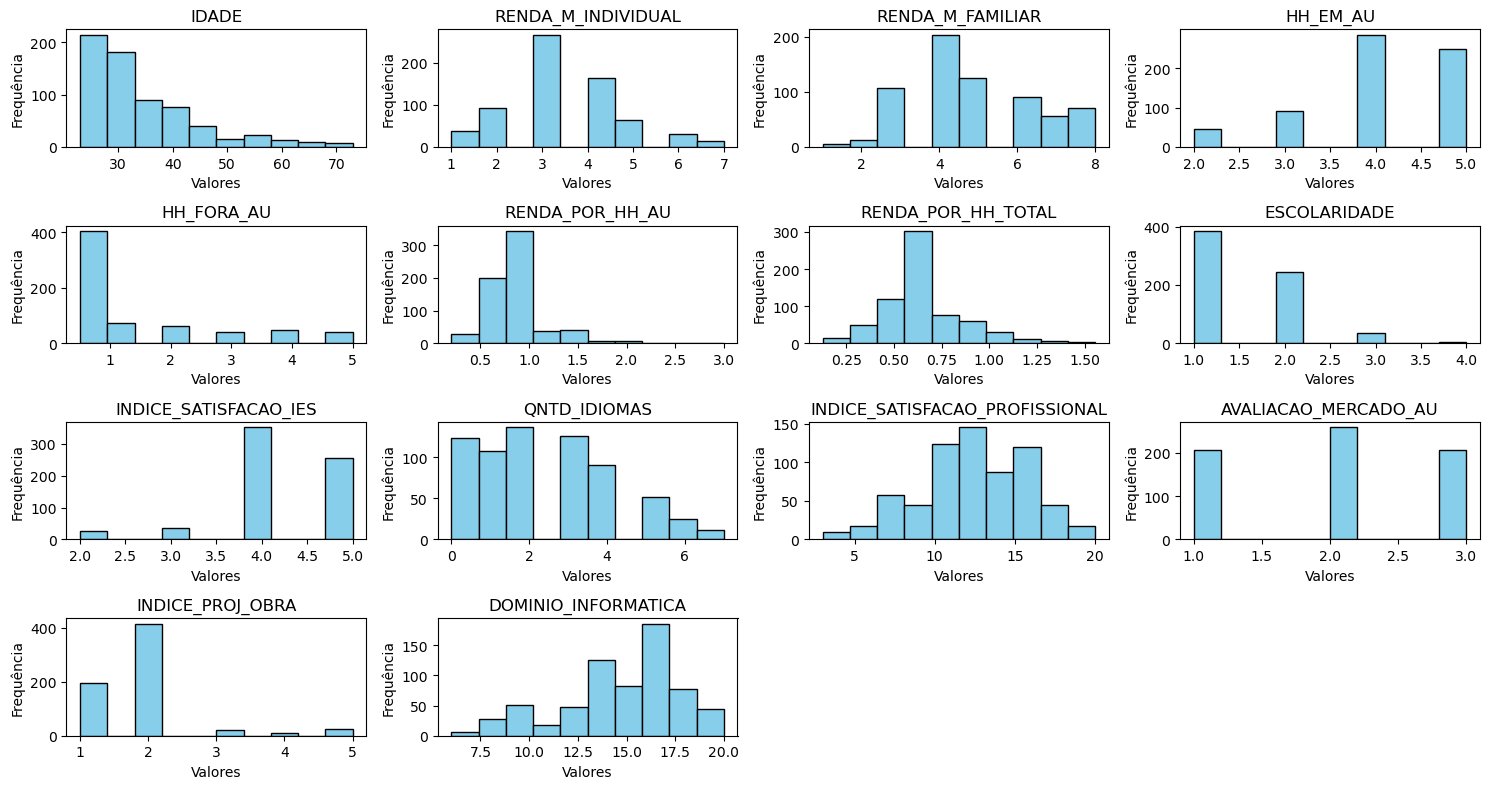

In [37]:
import matplotlib.pyplot as plt

num_cols = len(df_features.columns)
num_rows = -(-num_cols // 4)

fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 2))
axes = axes.flatten()

for i, col in enumerate(df_features.columns):
    ax = axes[i]
    ax.hist(df_features[col], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')

# Escondendo os eixos das subplots vazias e ajustando o layout
for j in range(num_cols, num_rows * 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [38]:
colunas_Standard = ['INDICE_FORMACAO_ACADEMICA','QNTD_IDIOMAS','INDICE_SATISFACAO_PROFISSIONAL','DOMINIO_INFORMATICA']
colunas_MinMax = ['HH_EM_AU','HH_FORA_AU','INDICE_SATISFACAO_IES','INDICE_PARTICIPACAO_EVENTOS','INDICE_OBSTACULOS_PROFISSIONAIS','AVALIACAO_MERCADO_AU','AVALIACAO_MERCADO_OUTROS','INDICE_PROJ_OBRA','QNTD_ENTIDADES_FILIADAS']
colunas_Robust = ['RENDA_M_INDIVIDUAL', 'RENDA_M_FAMILIAR','RENDA_POR_HH_AU', 'RENDA_POR_HH_TOTAL']
colunas_MaxAbs = []
colunas_Power = ['IDADE']
colunas_Quantile = ['IDADE']

lista = [
    (scaler_StandardScaler,colunas_Standard),
    (scaler_MinMaxScaler,colunas_MinMax),
    (scaler_RobustScaler,colunas_Robust),
    #(scaler_AmxAbsScaler,colunas_MaxAbs),
    #(scaler_PowerTransformer,colunas_Power),
    (scaler_QuantileTransformer,colunas_Quantile)
]

In [39]:
dfzinho = pd.DataFrame(scaler_RobustScaler.fit_transform(df_features), columns=df_features.columns)

In [83]:
dfzinho = df_features.copy()
for scaler, columns in lista:
    dfzinho[columns] = dfzinho[columns].apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten(), axis=0)

KeyError: "['INDICE_FORMACAO_ACADEMICA'] not in index"

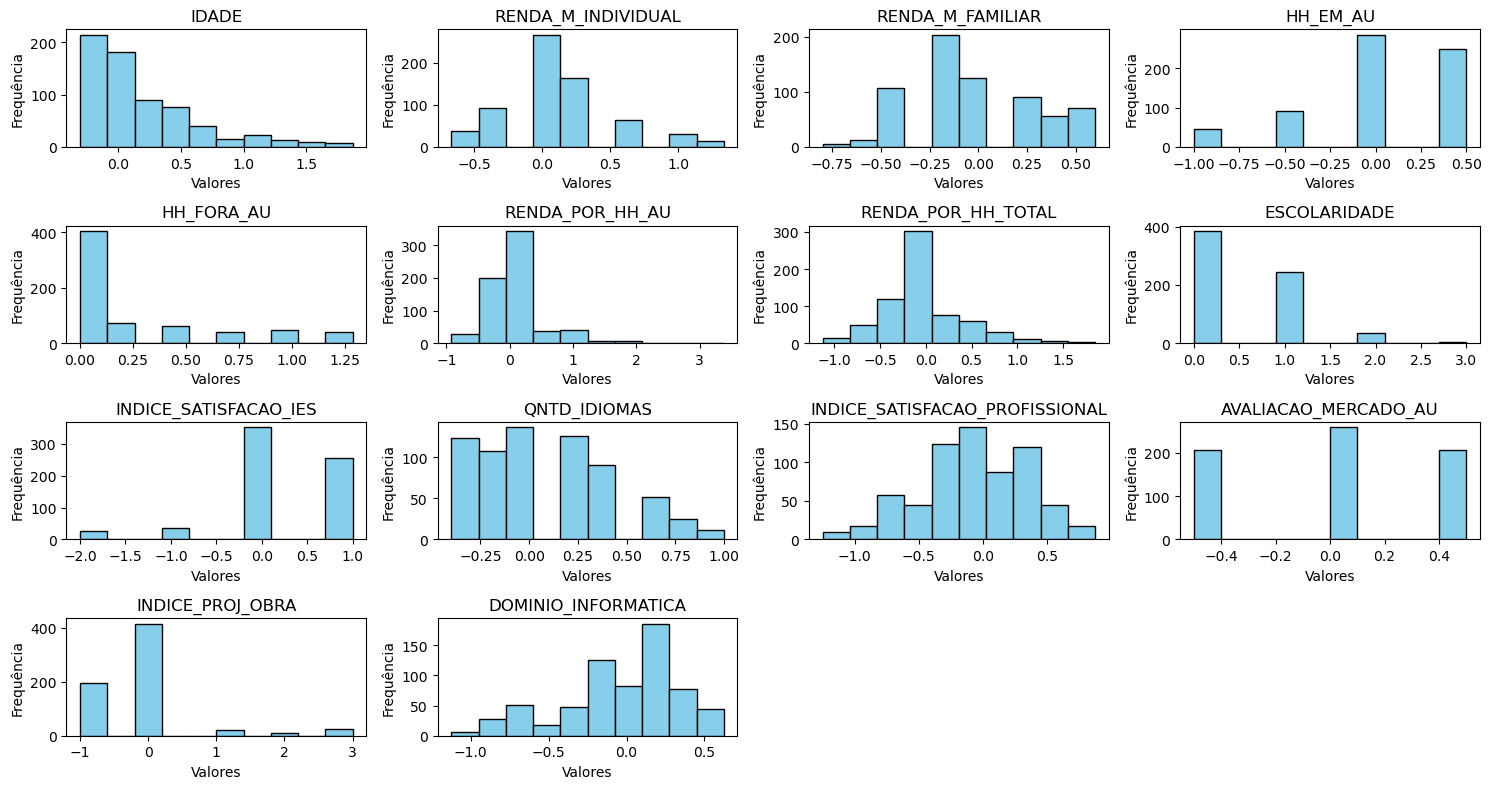

In [40]:
import matplotlib.pyplot as plt

num_cols = len(dfzinho.columns)
num_rows = -(-num_cols // 4) 

fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 2))
axes = axes.flatten()

for i, col in enumerate(dfzinho.columns):
    ax = axes[i]
    ax.hist(dfzinho[col], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')

for j in range(num_cols, num_rows * 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [41]:
scaler = scaler_RobustScaler
#scaler = scaler_MinMaxScaler

array_features = df_features.to_numpy()
array_scaled_features = scaler.fit_transform(array_features)
array_features.shape

(669, 14)

In [42]:
array_scaled_features = dfzinho.to_numpy()
array_scaled_features

array([[ 0.26086957,  0.33333333, -0.2       , ...,  0.5       ,
        -1.        ,  0.        ],
       [ 0.2173913 ,  0.        ,  0.6       , ...,  0.        ,
         0.        ,  0.25      ],
       [ 0.30434783,  0.        ,  0.2       , ..., -0.5       ,
         0.        ,  0.125     ],
       ...,
       [ 0.2173913 ,  0.        , -0.2       , ...,  0.5       ,
         0.        ,  0.5       ],
       [ 0.        ,  0.        , -0.2       , ..., -0.5       ,
         0.        ,  0.        ],
       [-0.08695652,  0.        , -0.2       , ...,  0.        ,
         0.        ,  0.125     ]])

## 2.4. Principal Component Analysis

Notice that HCAs can be either divisive and top-down, or agglomerative and bottom-up. The top-down DHC approach works best when you have fewer, but larger clusters, hence it's more computationally expensive. On the other hand, the bottom-up AHC approach is fitted for when you have many smaller clusters. It is computationally simpler, more used, and more available.

With the best line (linear combination) found, PCA gets the directions of its axes, called eigenvectors, and its linear coefficients, the eigenvalues. The combination of the eigenvectors and eigenvalues - or axes directions and coefficients - are the Principal Components of PCA. And that is when we can choose our number of dimensions based on the explained variance of each feature, by understanding which principal components we want to keep or discard based on how much variance they explain.

After obtaining the principal components, PCA uses the eigenvectors to form a vector of features that reorient the data from the original axes to the ones represented by the principal components - that's how the data dimensions are reduced.

PCA is a linear transformation, and linearity is sensitive to the scale of data. Therefore, PCA works best when all data values are on the same scale.

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

### 3.2.1. Pros

- __Correlated features are removed__
> When we are working with data in the real world, it is prevalent that we have thousands of features in the dataset.
So, if we run any algorithm on the dataset using all the features, it will reduce the algorithm’s performance, and it will not be easy to visualize that
many features in any kind of graph. So, we need to reduce the number of features in the dataset. One way to do this is to determine the correlation
between the features (correlated variables). To manually find correlation between thousands of features is nearly impossible, frustrating, and timeconsuming [6]. PCA solves this problem efficiently. After implementing PCA on the dataset, all the principal components are independent of one another, and there is no correlation between them.
- __Algorithm performance is improved__
>With so many features, the performance of the algorithm will drastically degrade. PCA is a technique that
can help in speeding up machine learning algorithms by getting rid of correlated variables that do not contribute to any decision making. With
a smaller number of features, the training time of the algorithm decreases significantly. So, if the input dataset dimension is enormous, then PCA
helps us speed up our algorithm.
- __Overfitting is reduced__
>Overfitting usually occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features [6].
- __Visualization is improved__
>  PCA helps us transform high dimensional data to low dimensional data to visualize it easily.

### 3.2.2. Cons

- __Potential performance degradation__
> The model performance of PCA drastically reduces if the assumptions of linearity are not met. __PCA is limited to linear data in terms of effectiveness and fails when there are nonlinear relationships within the data.__
- __Independent variables become less interpretable.__
> After we implement PCA on the dataset, the original features turn into principal components. Principal components are just linear combinations of the features of the original dataset [3]. Thus, principal components are not as readable and understandable as the original features.
- __Data standardization__
> Before implementing PCA, We have to standardize the data. Otherwise, PCA will not find the correct principal components. For example, let us say we have a feature
set with data denoted in units of Kilograms, Light years, or Millions [6]. In such a dataset, the variance scale is enormous. If PCA is applied to this
kind of dataset, the resultant loadings for high variance features will also be large. Thus, principal components will be biased toward high variance
features, which leads to false results. __Also, for standardization, all the categorical variables have to be converted into numerical values before applying PCA.__
- __Potential loss of information__
> Even though principal components try to cover maximum variance among the variables in the dataset, if we do not select the number of principal components with care, there is a good chance that we might miss some information as compared to the original list of variables [6].
- __Model performance reduction__
> Model performance reduces if the datasets have no or very low feature correlation.
- __Diferentiation classes consideration__
> The variance-based PCA technique does not consider the differentiating characteristics of the different classes. Furthermore, if the information that
differentiates one class from another is in the low variance components, it might be discarded.

### 3.3.3. PCA

In [43]:
array_scaled_features.shape

(669, 14)

PCA centers but does not scale the input data for each feature before applying the SVD.

The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance

 __This is often useful if the models down-stream make strong assumptions on the isotropy of the signal: this is for example the case for Support Vector Machines with the RBF kernel and the K-Means clustering algorithm.__

In [46]:
from sklearn.decomposition import PCA
pca = PCA(
    n_components=.95,
    copy=True,              # If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.
    whiten=False,           # When True the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
                            # Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve
                            # the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.
    svd_solver='full',      # {‘auto’, ‘full’, ‘arpack’, ‘randomized’},
        # auto:             The solver is selected by a default policy based on X.shape and n_components: if the input data is larger than 500x500 and the number of components
        #                   to extract is lower than  80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled.
        #                   Otherwise the exact full SVD is computed and optionally truncated afterwards.
        # full:             run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing
        # arpack:           run SVD truncated to n_components calling ARPACK solver via scipy.sparse.linalg.svds. It requires strictly 0 < n_components < min(X.shape)
        # randomized:       run randomized SVD by the method of Halko et al.
    tol=0.0,                # Tolerance for singular values computed by svd_solver == ‘arpack’. Must be of range [0.0, infinity).
    iterated_power='auto',  # Number of iterations for the power method computed by svd_solver == ‘randomized’. Must be of range [0, infinity).
    n_oversamples=50,       # This parameter is only relevant when svd_solver="randomized". It corresponds to the additional number of random vectors to sample the range of X so as to ensure proper conditioning. See randomized_svd for more details.
    power_iteration_normalizer='auto',  # Power iteration normalizer for randomized SVD solver. Not used by ARPACK. See randomized_svd for more details.
    random_state=None
)

In [47]:
array_transformed_PCA_features = pca.fit_transform(array_scaled_features)

print(
    array_transformed_PCA_features.shape,
    '\n Total de variância explicada: {}'.format(pca.explained_variance_ratio_.sum()),'\n',
    'Explicação de variância por Componente Principal: {}'.format(pca.explained_variance_ratio_),
    '\n Variância de rúido: {}'.format(pca.noise_variance_)
)

(669, 11) 
 Total de variância explicada: 0.964795904144103 
 Explicação de variância por Componente Principal: [0.20891706 0.1947099  0.13966895 0.09655805 0.07911193 0.06102363
 0.04932987 0.04580394 0.03327532 0.03015818 0.02623907] 
 Variância de rúido: 0.04099747192287871


### 3.3.4 Dual PCA

In [ ]:
dual_pca = PCA(
    #n_components=.8,
    n_components=3,
    copy=True,              # If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.
    whiten=False,           # When True the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
                            # Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve
                            # the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.
    svd_solver='auto',      # {‘auto’, ‘full’, ‘arpack’, ‘randomized’},
        # auto:             The solver is selected by a default policy based on X.shape and n_components: if the input data is larger than 500x500 and the number of components
        #                   to extract is lower than  80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled.
        #                   Otherwise the exact full SVD is computed and optionally truncated afterwards.
        # full:             run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing
        # arpack:           run SVD truncated to n_components calling ARPACK solver via scipy.sparse.linalg.svds. It requires strictly 0 < n_components < min(X.shape)
        # randomized:       run randomized SVD by the method of Halko et al.
    tol=0.0,                # Tolerance for singular values computed by svd_solver == ‘arpack’. Must be of range [0.0, infinity).
    iterated_power='auto',  # Number of iterations for the power method computed by svd_solver == ‘randomized’. Must be of range [0, infinity).
    n_oversamples=10,       # This parameter is only relevant when svd_solver="randomized". It corresponds to the additional number of random vectors to sample the range of X so as to ensure proper conditioning. See randomized_svd for more details.
    power_iteration_normalizer='auto',  # Power iteration normalizer for randomized SVD solver. Not used by ARPACK. See randomized_svd for more details.
    random_state=None
)

In [ ]:
array_transformed_dual_PCA_features = dual_pca.fit_transform(array_transformed_PCA_features)
#.transform(scaled_features)
print(
    '\n Total de variância explicada: {}'.format(dual_pca.explained_variance_ratio_.sum()),'\n',
    'Explicação de variância por Componente Principal: {}'.format(dual_pca.explained_variance_ratio_),
    '\n Variância de rúido: {}'.format(dual_pca.noise_variance_)
    
)


 Total de variância explicada: 0.357675107228456 
 Explicação de variância por Componente Principal: [0.16914506 0.10780115 0.0807289 ] 
 Variância de rúido: 0.756807596449741


### 3.3.5. Visualização 3D

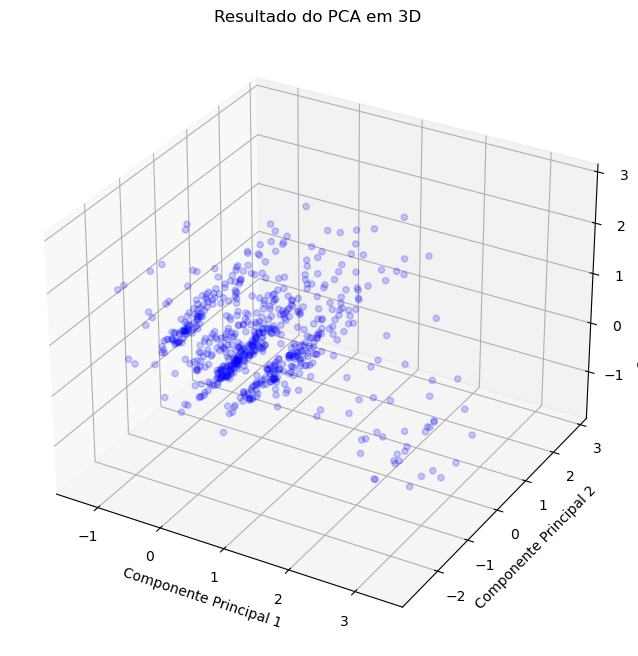

In [48]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(array_transformed_PCA_features[:, 0], array_transformed_PCA_features[:, 1], array_transformed_PCA_features[:, 2], c='b', marker='o', alpha=0.2)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Resultado do PCA em 3D')
plt.show()

## 2.5. Concatenação Embeddings

In [ ]:
#array_transformed_PCA_features = array_scaled_features
#array_transformed_SVD_features = array_features_cat

In [49]:
embeddings = array_transformed_SVD_features
df_embeddings = pd.DataFrame(array_transformed_SVD_features)
df_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.356696,-0.262693,0.019604,-0.867943,-0.323551,-0.152179,-0.036989,0.020705,-0.280989,-0.248194,0.067843,0.195542,-0.015442,0.074736,0.049923,-0.077686,-0.087440
1,1.509971,1.148290,1.059843,-0.728260,0.401763,0.374216,0.300860,-0.194146,0.152611,0.294069,-0.238991,-0.227778,0.026107,0.199688,-0.418607,0.706040,-0.448336
2,1.618870,0.135085,0.600757,-0.939778,0.101536,0.620065,0.270276,0.094250,-0.440860,0.356694,0.379844,0.563876,0.012896,0.401304,-0.243780,0.209007,0.365520
3,1.537987,-0.763092,-0.143582,0.495403,-0.043880,-0.000611,0.746811,0.149571,-0.180840,-0.312461,-0.203742,0.123318,0.040503,0.062373,0.034390,-0.054928,-0.069707
4,1.315290,-0.333034,-0.829045,-0.271014,0.134532,0.084107,-0.252104,-0.123106,-0.245187,0.179522,-0.062899,-0.004843,-0.029239,-0.253419,-0.217297,0.099166,0.265387


In [50]:
import numpy as np

hstack_result = np.hstack((array_transformed_PCA_features, array_transformed_SVD_features))
embeddings = hstack_result
df_embeddings = pd.DataFrame(embeddings)
df_embeddings.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.650620,0.645336,0.671028,-0.159105,-0.114563,0.129294,-0.382681,-0.034551,-0.448965,0.098461,...,0.020705,-0.280989,-0.248194,0.067843,0.195542,-0.015442,0.074736,0.049923,-0.077686,-0.087440
1,0.168795,-0.571143,1.275709,-0.463137,0.369810,-0.226897,0.353362,0.730651,0.222869,0.165323,...,-0.194146,0.152611,0.294069,-0.238991,-0.227778,0.026107,0.199688,-0.418607,0.706040,-0.448336
2,0.067517,0.203617,-0.861992,0.404117,-0.342225,-0.340145,0.158738,-0.148851,0.110805,0.124160,...,0.094250,-0.440860,0.356694,0.379844,0.563876,0.012896,0.401304,-0.243780,0.209007,0.365520
3,-0.138324,-0.512220,-0.134826,-0.754261,0.296344,-0.635745,0.446631,-0.589633,0.247665,0.425087,...,0.149571,-0.180840,-0.312461,-0.203742,0.123318,0.040503,0.062373,0.034390,-0.054928,-0.069707
4,-0.254970,-0.951720,-0.458454,-0.390361,-0.549112,-0.516924,-0.141702,0.403219,0.642507,0.386395,...,-0.123106,-0.245187,0.179522,-0.062899,-0.004843,-0.029239,-0.253419,-0.217297,0.099166,0.265387


In [51]:
df_embeddings.shape

(669, 28)

In [52]:
arquivo = 'DF_CAU_03.parquet'
df_embeddings.to_parquet(os.path.join(diretorio_df, arquivo), compression='gzip', engine='pyarrow')

# 3. Visualização do Embedding Space

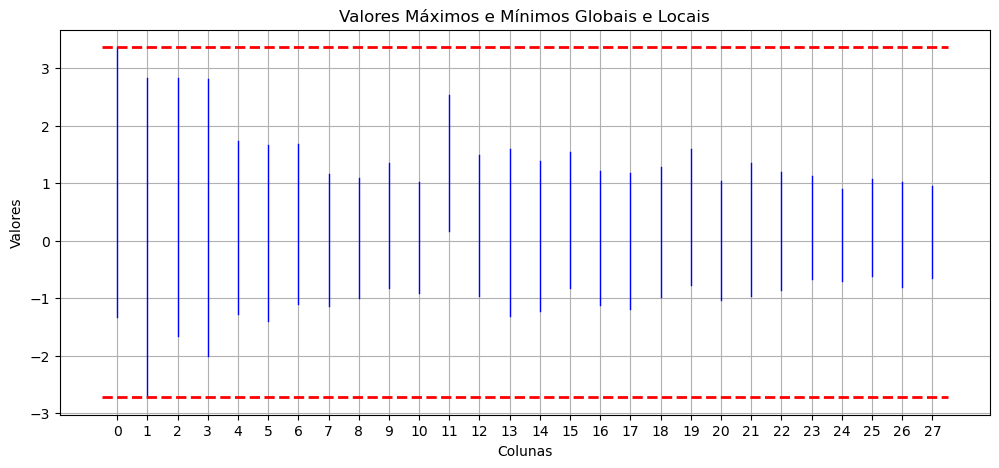

In [53]:
import numpy as np
import matplotlib.pyplot as plt

array = embeddings

max_col = np.max(array, axis=0)
min_col = np.min(array, axis=0)

max_global = np.max(array)
min_global = np.min(array)

plt.figure(figsize=(12, 5))

for i in range(array.shape[1]):
    plt.plot([i, i], [min_col[i], max_col[i]], color='blue', linewidth=1)

plt.plot([-0.5, array.shape[1]-0.5], [min_global, min_global], linestyle='--', color='red', label='Mínimo Global', linewidth=2)
plt.plot([-0.5, array.shape[1]-0.5], [max_global, max_global], linestyle='--', color='red', label='Máximo Global', linewidth=2)

plt.xticks(range(array.shape[1]))
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.title('Valores Máximos e Mínimos Globais e Locais')
#plt.legend()
plt.grid(True)
plt.show()

## X.X. Análise Estatística

In [54]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt

dist_euclidiana = pairwise_distances(embeddings, metric='euclidean')
media_dist_euclidiana = np.mean(dist_euclidiana, axis=1)
std_dist_euclidiana = np.std(dist_euclidiana, axis=1)

dist_manhattan = pairwise_distances(embeddings, metric='manhattan')
media_dist_manhattan = np.mean(dist_manhattan, axis=1)
std_dist_manhattan = np.std(dist_manhattan, axis=1)

dist_cosseno = pairwise_distances(embeddings, metric='cosine')
media_dist_cosseno = np.mean(dist_cosseno, axis=1)
std_dist_cosseno = np.std(dist_cosseno, axis=1)

similaridade_cosseno = 1 - dist_cosseno
media_similaridade_cosseno = np.mean(similaridade_cosseno, axis=1)
std_similaridade_cosseno = np.std(similaridade_cosseno, axis=1)

dist_cityblock = pairwise_distances(embeddings, metric='l2')
media_dist_cityblock = np.mean(dist_cityblock, axis=1)
std_dist_cityblock = np.std(dist_cityblock, axis=1)


medias = np.column_stack((media_dist_euclidiana, media_dist_manhattan, media_dist_cosseno, media_similaridade_cosseno, media_dist_cityblock)).transpose()
std = np.column_stack((std_dist_euclidiana, std_dist_manhattan, std_dist_cosseno, std_similaridade_cosseno, std_dist_cityblock)).transpose()

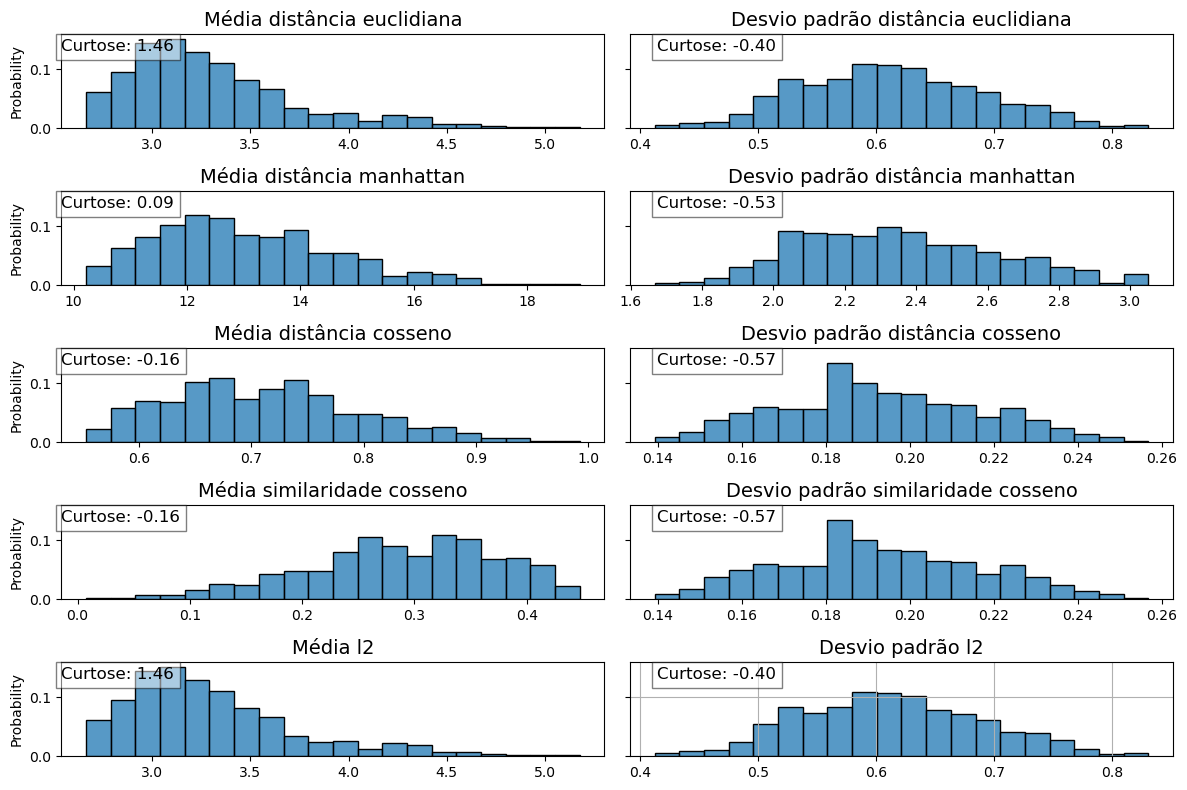

In [55]:
from scipy.stats import kurtosis
import seaborn as sns

n_linhas, n_colunas = medias.shape
fig, axs = plt.subplots(n_linhas, 2, figsize=(12, 8), sharex=False, sharey=True)

dict_dist = {}
dict_dist[0] = "distância euclidiana"
dict_dist[1] = "distância manhattan"
dict_dist[2] = "distância cosseno"
dict_dist[3] = "similaridade cosseno"
dict_dist[4] = "l2"


for i in range(5):
    sns.histplot(
        data=medias[i],
        x=None, y=None,
        hue=None,
        weights=None,
        stat='probability',
        bins=20,
        binwidth=None,
        binrange=None,
        discrete=False,
        cumulative=False,
        common_bins=True,
        common_norm=True,
        multiple='layer',
        element='bars',
        fill=True,
        shrink=1,
        kde=False,
        kde_kws=None, line_kws=None,
        thresh=0, pthresh=None,
        pmax=None,
        cbar=False, cbar_ax=None, cbar_kws=None,
        palette=None,
        hue_order=None, hue_norm=None,
        color=None,
        log_scale=None,
        legend=True, ax=axs[i,0]
        ).set_title(f'Média {dict_dist[i]}', fontsize=14)
    sns.histplot(
        data=std[i],
        x=None, y=None,
        hue=None,
        weights=None,
        stat='probability',
        bins=20,
        binwidth=None,
        binrange=None,
        discrete=False,
        cumulative=False,
        common_bins=True,
        common_norm=True,
        multiple='layer',
        element='bars',
        fill=True,
        shrink=1,
        kde=False,
        kde_kws=None, line_kws=None,
        thresh=0, pthresh=None,
        pmax=None,
        cbar=False, cbar_ax=None, cbar_kws=None,
        palette=None,
        hue_order=None, hue_norm=None,
        color=None,
        log_scale=None,
        legend=True, ax=axs[i,1]
    ).set_title(f'Desvio padrão {dict_dist[i]}', fontsize=14)
    axs[i, 0].text(0.0, 0.95, f'Curtose: {kurtosis(medias[i]):.2f}', transform=axs[i, 0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    axs[i, 1].text(0.05, 0.95, f'Curtose: {kurtosis(std[i]):.2f}', transform=axs[i, 1].transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.grid(True)
plt.show()